<a href="https://colab.research.google.com/github/ucefk/bird_generator_project/blob/main/bird_project_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision

import pandas as pd
import numpy as np
import torch
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import random
import cv2
import matplotlib.pyplot as plt

from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

import os


In [ ]:
!ls /content/drive/MyDrive/Project_Black_Bird/dataset/CUB_200_2011/CUB_200_2011/

attributes	    editedImages	    images.txt	train_test_split.txt
bounding_boxes.txt  image_class_labels.txt  parts
classes.txt	    images		    README


In [ ]:
dataset_dir = '/content/drive/MyDrive/Project_Black_Bird/dataset/CUB_200_2011/CUB_200_2011/'
dataset_images_dir = dataset_dir + 'images/'

In [ ]:
PATH = Path(dataset_dir)

images = pd.read_csv(PATH/"images.txt", header=None, sep=" ")
images.columns = ["id", "name"]

bounding_boxes = pd.read_csv(PATH/"bounding_boxes.txt", header=None, sep=" ")
bounding_boxes.columns = ["id", "x", "y", "width", "height"]


torch.Size([3, 422, 500]) (422, 500, 3)
131 157 297 323


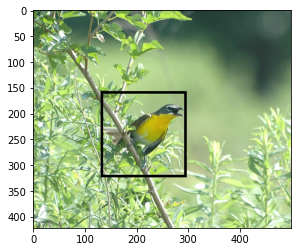

In [ ]:
img_num = 1075

img_path = images.iloc[img_num, 1]

values = images[images['name'] == img_path]['id'].tolist()
id_box = values[0]


# read input image 
img = read_image(str(PATH)+'/images/'+img_path)
img2 = cv2.imread(str(PATH)+'/images/'+img_path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print( img.shape, img2.shape)# bounding box are xmin, ymin, xmax, ymax

Coordinates = bounding_boxes[bounding_boxes['id'] == id_box]
Coordinates = Coordinates.drop('id', axis=1)
Coordinates = Coordinates.values.tolist()
Coordinates = Coordinates[0]
x = int(Coordinates[0])
y = int(Coordinates[1])
w = int(Coordinates[2] + x)
z = int(Coordinates[2] + y)
print(x, y, w ,z)

box = [x, y, w, z]
box = torch.tensor(box)
box = box.unsqueeze(0)

# draw bounding box and fill color
img = draw_bounding_boxes(img, box, width=5)

# transform this image to PIL image
img = torchvision.transforms.ToPILImage()(img)

# display output
plt.imshow(img)

new_img = img2[y:z, x:w]
#plt.imshow(new_img)


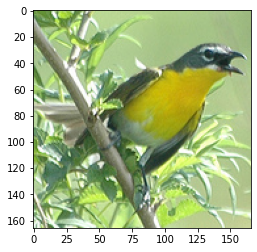

In [ ]:
new_img = img2[y:z, x:w]
plt.imshow(new_img)

In [ ]:
dataset = pd.concat([images, bounding_boxes.iloc[:,1:]], axis = 1)

dataset.head()

,id,name,x,y,width,height
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,60.0,27.0,325.0,304.0
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,139.0,30.0,153.0,264.0
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,14.0,112.0,388.0,186.0
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,112.0,90.0,255.0,242.0
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,70.0,50.0,134.0,303.0


0    None
1    None
dtype: object

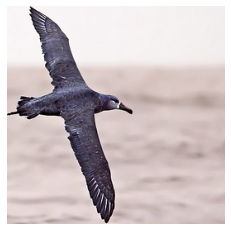

In [ ]:
edited_images_path = str(PATH) + '/edit/editedImages/'

def seperateImages(row):
  img = read_image(str(PATH)+'/images/'+row['name'])
  img2 = cv2.imread(str(PATH)+'/images/'+row['name'])

  delta = int(row['width']) if (int(row['width'] > int(row['height']))) else int(row['height'])

  x = int(row['x'])
  y = int(row['y'])
  w = delta + x
  z = delta + y

  new_img = img2[y:z, x:w]
  plt.imshow(new_img)
  plt.axis('off')

  plt.imsave(edited_images_path + str(row['id']) + ".png", new_img, format="png")

dataset.apply(seperateImages, axis = 1)

In [ ]:
edited_images_path = str(PATH) + '/root/edit/editedImages/'